集成算法：考虑多个评估器的建模结果，汇总以后得到一个综合的结果，以此获取比单个模型更好的回归或者分类表现
多个模型集成，成为集成评估器（ensemble estimater），组成评估其的每个模型都叫基评估器
通常有三类集成算法
1. bagging 模型独立，互相平行-》随机森林
2. Boosting 模型有序，逐渐提升-》梯度提升树（GBDT），Adaboost
3. stacking


随机森林所有的基评估器都是决策树

+ ExtraTreesClassifier
    + 随机森林的变种，差别在于，随机森林会通过随机采样来作为子决策树训练集，而ETC会使用原始训练集训练子树
    +ETC划分特征时不是选择最尤特征，而是随机选择一个，所以规模一般比RF大，一般来说泛化能力强于RF，但会更慢

In [1]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
%matplotlib  inline

对基评估器的预测结果进行平均或多数表决原则，如红酒例子中，如果有25课树，其中13课以上判断错误，随机森林才会判断错误，所以判断错误的几率是很低的,每棵树的参数其实都是相同的，不同的只有random_state和训练集，所以每棵树会长的不一样

参数：n_estimators 集评估器数量，往往越大效果越好，但任何模型都有决策边界，到一定程度就不会再提升,默认100
    bootstrap:进行随机采样，让用来每个树拟合的数据都是不一样的,默认为真，但这种随机抽样，概率上来说会有百分之37的训练数据永远不会被抽到，被浪费，每一个样本被抽到的概率 1-(1-1/n)^n≈1-(1/e)≈63.2。若为False，则每棵树都会用全部的训练集进行训练
    oob_score 默认为False，如果为真，即不用划分训练集和测试集，如下
    rfc=RandomForestClassifier(n_esimators=25,oob_score=True)
    rfc.fit(data,target) 不用划分
    rfc.oob_score_ 得出分数
此外，决策树的参数他都有，特别是feature_improtance可用

In [6]:
wine = load_wine()

In [7]:
data=wine.data
target=wine.target

In [10]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [12]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
#比较决策树和随机森立的结果
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

In [13]:
score_c

0.8888888888888888

In [14]:
score_r

0.9814814814814815

In [17]:
#交叉验证
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

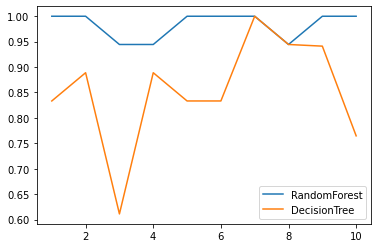

In [18]:
rfc = RandomForestClassifier( )
rfc_s = cross_val_score(rfc,data,target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,data,target,cv=10)

plt.plot(range(1,11),rfc_s,label="RandomForest")
plt.plot(range(1,11),clf_s,label="DecisionTree")
plt.legend()
plt.show()
#显然随机森林效果一直好于决策树

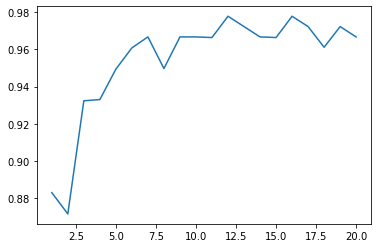

In [20]:
superpa=[]
for i in range(20):
    rfc=RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,data,target,cv=10).mean()
    superpa.append(rfc_s)
plt.plot(range(1,21),superpa)
plt.show()

In [27]:
#查看森林中树的情况
rfc=RandomForestClassifier(n_estimators=25,random_state=5)
rfc.fit(Xtrain,Ytrain)

RandomForestClassifier(n_estimators=25, random_state=5)

In [28]:
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=953453411),
 DecisionTreeClassifier(max_features='auto', random_state=236996814),
 DecisionTreeClassifier(max_features='auto', random_state=1592283119),
 DecisionTreeClassifier(max_features='auto', random_state=1423042237),
 DecisionTreeClassifier(max_features='auto', random_state=887852006),
 DecisionTreeClassifier(max_features='auto', random_state=1562238070),
 DecisionTreeClassifier(max_features='auto', random_state=1797920144),
 DecisionTreeClassifier(max_features='auto', random_state=2059200585),
 DecisionTreeClassifier(max_features='auto', random_state=2097710088),
 DecisionTreeClassifier(max_features='auto', random_state=385778404),
 DecisionTreeClassifier(max_features='auto', random_state=479936231),
 DecisionTreeClassifier(max_features='auto', random_state=1703970750),
 DecisionTreeClassifier(max_features='auto', random_state=1142065563),
 DecisionTreeClassifier(max_features='auto', random_state=1521011312),
 DecisionTr